In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [12]:
x_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')

x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')


In [13]:
x_train = x_train.reshape(len(x_train),100, 100, 3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0


In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 100, 100, 3)


In [15]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

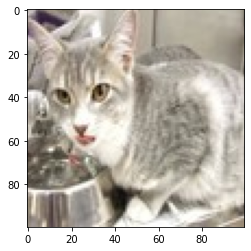

In [18]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()        

In [19]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

           

In [20]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add( MaxPooling2D((2, 2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add( MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [26]:
model.fit(x_train,y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 23s 696ms/step - loss: 0.4584 - accuracy: 0.7850
Epoch 2/5
32/32 [==============================] - 20s 621ms/step - loss: 0.4037 - accuracy: 0.8200
Epoch 3/5
32/32 [==============================] - 20s 622ms/step - loss: 0.3348 - accuracy: 0.8555
Epoch 4/5
32/32 [==============================] - 20s 632ms/step - loss: 0.2683 - accuracy: 0.8890
Epoch 5/5
32/32 [==============================] - 20s 635ms/step - loss: 0.2177 - accuracy: 0.9140


In [27]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 3s 213ms/step - loss: 0.9034 - accuracy: 0.6600


[0.9034333825111389, 0.6600000262260437]

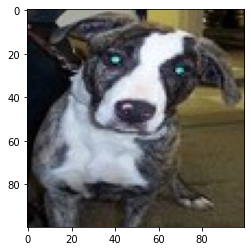

[[0.42829582]]
Our model says it is a :  dog


In [43]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()  

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
if (y_pred == 0):
    pred = 'dog'
else:
    pred ='cat'
print("Our model says it is a : ", pred)    
    